# Bigmart Outlet Sales Prediction

# importing all necassary libraries


In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Data processing and cleaning

In [145]:
cd E:\datasets\big-mart-sales-prediction

E:\datasets\big-mart-sales-prediction


In [146]:
df1=pd.read_csv('Submission.csv')

In [147]:
df1.head()

,Unnamed: 0,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,0,FDW58,OUT049,1636.244023
1,1,FDW14,OUT017,1409.355910
2,2,NCN55,OUT010,710.594286
3,3,FDQ58,OUT017,2355.184955
4,4,FDY38,OUT027,5857.916205


In [148]:
df2=pd.read_csv('Train.csv')

In [149]:
df3=pd.read_csv('Test.csv')

In [150]:
df3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [151]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [152]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [153]:
df2.isna().sum(
)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

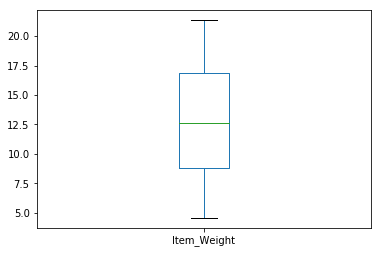

In [154]:
df2['Item_Weight'].plot.box()

In [155]:
df2['Item_Weight']=df2['Item_Weight'].fillna(
    df2['Item_Weight'].mean())

In [156]:
df2['Outlet_Size'] = df2['Outlet_Size'].fillna(df2['Outlet_Size'].mode()[0])

In [157]:
df2.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [158]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [159]:
df2['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [160]:
df3['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [161]:
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].str.replace('low fat', 'Low Fat')
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].str.replace('LF', 'Low Fat')
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].str.replace('reg', 'Regular')

In [162]:
df3['Item_Fat_Content'] = df3['Item_Fat_Content'].str.replace('low fat', 'Low Fat')
df3['Item_Fat_Content'] = df3['Item_Fat_Content'].str.replace('LF', 'Low Fat')
df3['Item_Fat_Content'] = df3['Item_Fat_Content'].str.replace('reg', 'Regular')

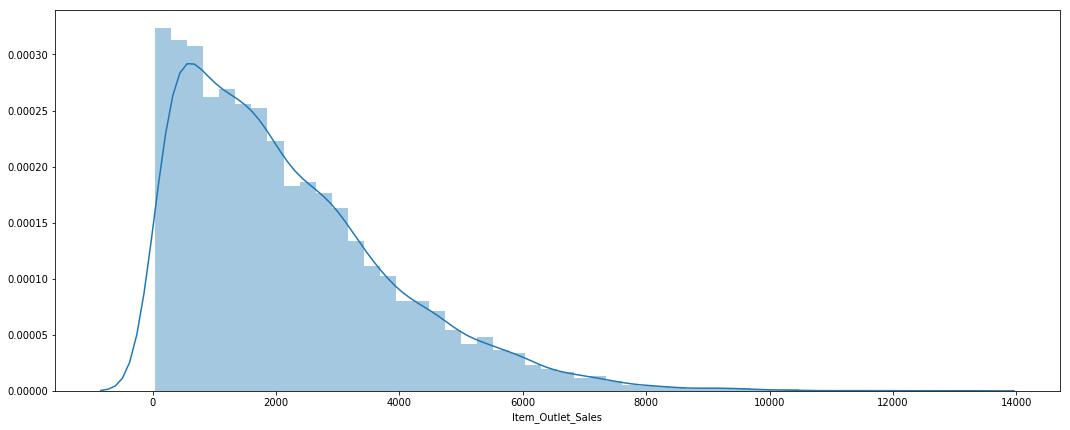

In [163]:
plt.figure(figsize=(18, 7))
sns.distplot(df2['Item_Outlet_Sales'])

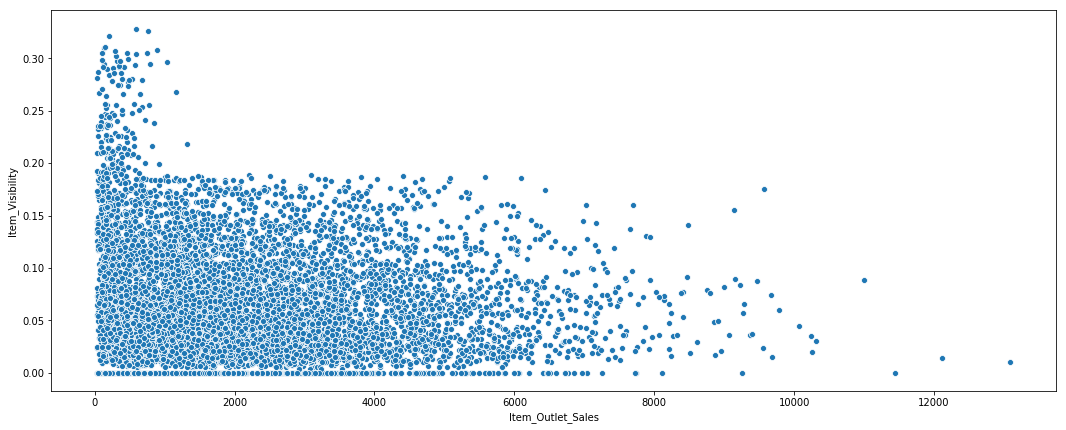

In [164]:
plt.figure(figsize=(18, 7))
sns.scatterplot(x="Item_Outlet_Sales",y="Item_Visibility",data=df2)

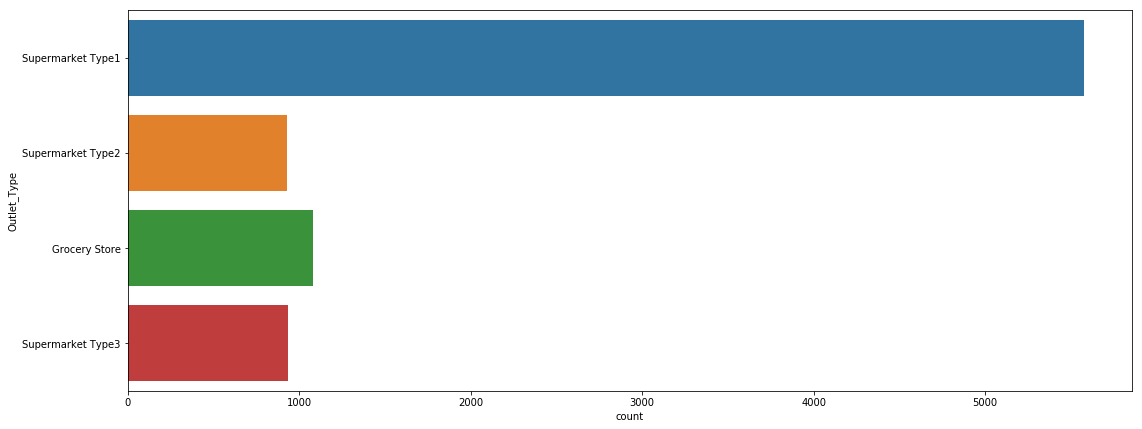

In [165]:
plt.figure(figsize=(18, 7))
sns.countplot(y='Outlet_Type',data=df2)

In [166]:
df2['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

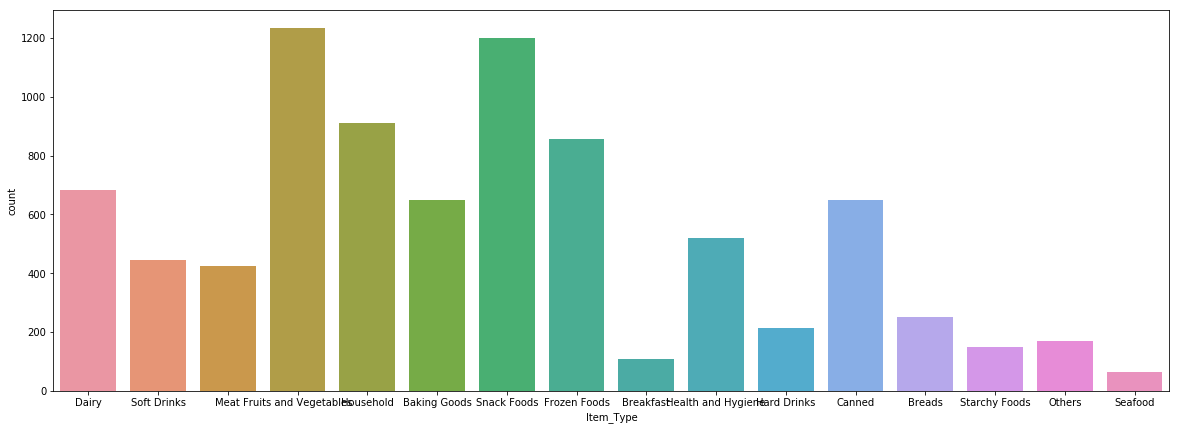

In [167]:
plt.figure(figsize=(20, 7))
sns.countplot(x='Item_Type',data=df2)

In [168]:
df2['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [169]:
def create_Category(data):
    if str(data['Item_Identifier']).startswith('NC'):
        return 'NonConsumable'
    elif str(data['Item_Identifier']).startswith('FD'):
        return 'Food'
    else:
        return 'Drink'

df2['Item_Category']= df2.apply(create_Category,axis=1)
df3['Item_Category']= df3.apply(create_Category,axis=1)



In [170]:
df2['Item_Category'].value_counts()

Food             6125
NonConsumable    1599
Drink             799
Name: Item_Category, dtype: int64

In [171]:
df3['Item_Category'].value_counts()

Food             4076
NonConsumable    1087
Drink             518
Name: Item_Category, dtype: int64

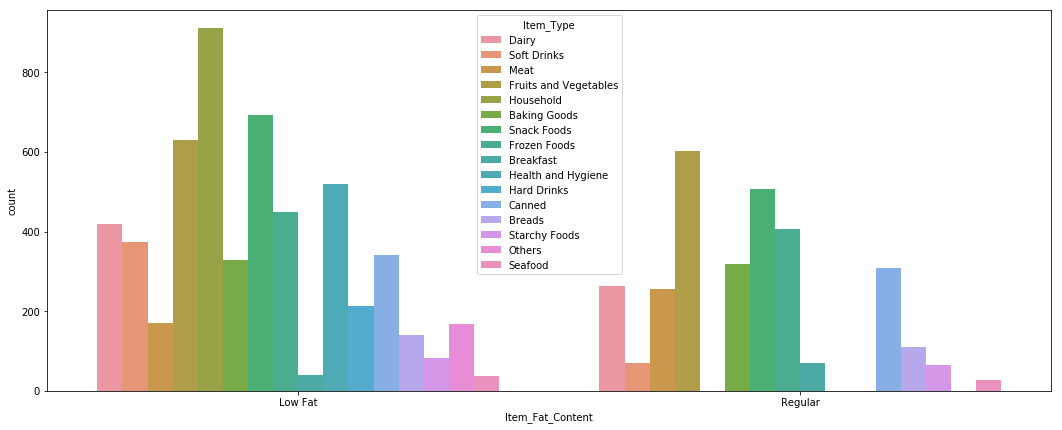

In [172]:
plt.figure(figsize=(18, 7))
sns.countplot(x="Item_Fat_Content",hue="Item_Type",data=df2)


In [173]:
df2['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [174]:
df2.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drink
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NonConsumable
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,Food
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,Food
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,Food
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,Food
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,Food


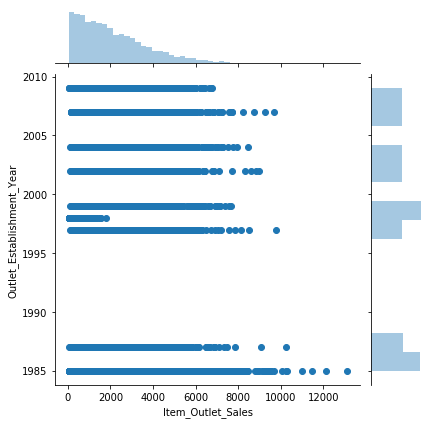

In [175]:
sns.jointplot(df2['Item_Outlet_Sales'],df2['Outlet_Establishment_Year'])

In [176]:
df4= pd.read_csv("Submission.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
Item_Category                8523 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 865.7+ KB


In [177]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 12 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
Item_Category                5681 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 532.7+ KB


# Data processing

In [179]:
df_dummies=pd.get_dummies(df2['Item_Type'])
df_dummies.drop(df_dummies.columns[-1],axis=1)
df_dummies1=pd.get_dummies(df2['Item_Fat_Content'])
df_dummies1.drop(df_dummies1.columns[-1],axis=1)
df_dummies2=pd.get_dummies(df2['Outlet_Size'])
df_dummies2.drop(df_dummies2.columns[-1],axis=1)
df_dummies3=pd.get_dummies(df2['Outlet_Location_Type'])
df_dummies3.drop(df_dummies3.columns[-1],axis=1)
df_dummies4=pd.get_dummies(df2['Outlet_Type'])
df_dummies4.drop(df_dummies4.columns[-1],axis=1)
df2=pd.concat([df2,df_dummies],axis=1)
df2=pd.concat([df2,df_dummies1],axis=1)
df2=pd.concat([df2,df_dummies2],axis=1)
df2=pd.concat([df2,df_dummies3],axis=1)
df2=pd.concat([df2,df_dummies4],axis=1)

In [220]:
df_dummies5=pd.get_dummies(df2['Outlet_Establishment_Year'])
df_dummies5.drop(df_dummies5.columns[-1],axis=1)
df2=pd.concat([df2,df_dummies5],axis=1)

In [180]:
df_dummies=pd.get_dummies(df3['Item_Type'])
df_dummies.drop(df_dummies.columns[-1],axis=1)
df_dummies1=pd.get_dummies(df3['Item_Fat_Content'])
df_dummies1.drop(df_dummies1.columns[-1],axis=1)
df_dummies2=pd.get_dummies(df3['Outlet_Size'])
df_dummies2.drop(df_dummies2.columns[-1],axis=1)
df_dummies3=pd.get_dummies(df3['Outlet_Location_Type'])
df_dummies3.drop(df_dummies3.columns[-1],axis=1)
df_dummies4=pd.get_dummies(df3['Outlet_Type'])
df_dummies4.drop(df_dummies4.columns[-1],axis=1)
df3=pd.concat([df3,df_dummies],axis=1)
df3=pd.concat([df3,df_dummies1],axis=1)
df3=pd.concat([df3,df_dummies2],axis=1)
df3=pd.concat([df3,df_dummies3],axis=1)
df3=pd.concat([df3,df_dummies4],axis=1)

In [221]:
df_dummies5=pd.get_dummies(df3['Outlet_Establishment_Year'])
df_dummies5.drop(df_dummies5.columns[-1],axis=1)
df3=pd.concat([df3,df_dummies5],axis=1)

In [224]:
#df2=df2.drop(['Item_Identifier'], axis=1)
#df2=df2.drop(['Item_Fat_Content'], axis=1)
#df2=df2.drop(['Item_Type'], axis=1)
#df2=df2.drop(['Item_Fat_Content'], axis=1)
#df2=df2.drop(['Outlet_Identifier'], axis=1)
#df2=df2.drop(['Outlet_Size'], axis=1)
#df2=df2.drop(['Outlet_Location_Type'], axis=1)
#df2=df2.drop(['Outlet_Size'], axis=1)
#df2=df2.drop(['Outlet_Type'], axis=1)
#df2=df2.drop(['Item_Category'], axis=1)
df2=df2.drop(['Outlet_Establishment_Year'], axis=1)

In [203]:
df3.head()
df3['Item_Weight']=df3['Item_Weight'].fillna(
    df3['Item_Weight'].mean())

In [204]:
df3['Outlet_Size'] = df3['Outlet_Size'].fillna(df3['Outlet_Size'].mode()[0])

In [207]:
df3.isna().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Category                0
Baking Goods                 0
Breads                       0
Breakfast                    0
Canned                       0
Dairy                        0
Frozen Foods                 0
Fruits and Vegetables        0
Hard Drinks                  0
Health and Hygiene           0
Household                    0
Meat                         0
Others                       0
Seafood                      0
Snack Foods                  0
Soft Drinks                  0
Starchy Foods                0
Low Fat                      0
Regular                      0
High                         0
Medium                       0
Small                        0
Tier 1                       0
Tier 2                       0
Tier 3  

In [217]:
df3=df3.drop(['Outlet_Type'], axis=1)
df3=df3.drop(['Item_Category'], axis=1)

In [226]:
df3=df3.drop(['Outlet_Establishment_Year'], axis=1)

In [227]:
df3.head()

,Item_Weight,Item_Visibility,Item_MRP,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,...,Supermarket Type3,1985,1987,1997,1998,1999,2002,2004,2007,2009
0,20.750000,0.007565,107.8622,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,8.300000,0.038428,87.3198,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,14.600000,0.099575,241.7538,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,7.315000,0.015388,155.0340,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,12.695633,0.118599,234.2300,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0


In [237]:
x_train=df2.loc[:,df2.columns != 'Item_Outlet_Sales'].values
y_train=df2.iloc[:,3].values

x_test = df3.iloc[:].values
y_test = df4.iloc[:,-1].values

# Building Regression Model For The DataSet

# Multiple Linear Regression

In [240]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [241]:
y_pred = reg.predict(x_test)

In [242]:
r2_score(y_pred, y_test)


0.9230446176985291

In [244]:
reg.score(x_test,y_test)

0.922469425289803

Showing the errors:

In [245]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

243.32697804529644
129334.51587956419


# Decision Tree Regression

In [246]:
reg2 = DecisionTreeRegressor(random_state=0)
reg2.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [249]:
y_pred2 = reg2.predict(x_test)

In [250]:
r2_score(y_pred2, y_test)

0.5828057723629996

Showing the errors

In [251]:
print(mean_absolute_error(y_test, y_pred2))
print(mean_squared_error(y_test, y_pred2))

796.8974719884792
1300529.3562024496


# Random Forest

In [252]:
reg3= RandomForestRegressor(n_estimators=50)
reg3.fit(x_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [254]:
y_pred3=reg3.predict(x_test)


In [255]:
r2_score(y_pred3, y_test)

0.913720833927316

Showing the errors

In [263]:
print(mean_absolute_error(y_test, y_pred3))
print(mean_squared_error(y_test, y_pred3))

282.8595481795117
167873.1976759737


# Percentage Score Of Each

# Multiple Linear Regression = 92.24%

# Random Forest Regression = 91.37%